In [50]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import csv

In [51]:
# Clean Dataset
    
#import the data for python
from pandas import read_excel
my_sheet = 'Sayfa1' # change it to your sheet name of excel file
file_name = r'C:\Users\asus\Desktop\tubitak_project\GCCR\GCCR 3 data analysis\gccr 3\aim1\cleandata.xlsx' # change it to your excel file
data = read_excel(file_name, sheet_name = my_sheet)
print(data.head())
data.describe()

   Smell_before_illness  Smell_during_illness  Smell_current  \
0                  89.5                   4.8           31.0   
1                 100.0                   0.0           99.6   
2                  98.5                   0.6          100.0   
3                  97.9                   4.5           70.2   
4                  94.1                   0.0           61.4   

   Taste_before_illness  Taste_during_illness  Taste_current  \
0                  93.4                   9.1           33.7   
1                  86.4                   4.0           88.1   
2                  98.5                   0.0          100.0   
3                 100.0                   8.5           82.1   
4                  99.5                  91.1           99.5   

   COVID_diagnosis_strict  SurveyTimeLapse  Status  smell_loss_y  
0                       0            162.0       0             0  
1                       1            165.0       0             0  
2                       1    

,Smell_before_illness,Smell_during_illness,Smell_current,Taste_before_illness,Taste_during_illness,Taste_current,COVID_diagnosis_strict,SurveyTimeLapse,Status,smell_loss_y
count,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.0,2651.000000
mean,92.464127,7.055715,63.467974,93.070389,20.327160,74.176613,0.608450,195.554904,0.0,0.291211
std,10.870954,17.178560,28.809611,9.661622,26.145237,24.958464,0.488189,52.125809,0.0,0.454406
min,40.200000,0.000000,0.000000,41.200000,0.000000,0.000000,0.000000,23.000000,0.0,0.000000
25%,88.500000,0.000000,45.650000,89.500000,0.700000,61.800000,0.000000,167.000000,0.0,0.000000
50%,97.900000,0.800000,69.900000,97.600000,8.800000,81.700000,1.000000,197.041700,0.0,0.000000
75%,100.000000,4.800000,87.000000,100.000000,29.850000,93.700000,1.000000,242.041700,0.0,1.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,295.041700,0.0,1.000000


In [52]:
data = data.query('COVID_diagnosis_strict == 1')
len(data)

1613

In [53]:
#SMELL
X = np.array(data.SurveyTimeLapse).reshape(-1, 1)  
Y = np.array((data['Smell_before_illness']/data['Smell_before_illness']) - (data['Smell_current']/data['Smell_before_illness']))
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  # linear regression
Y_pred = linear_regressor.predict(X)  # predictions

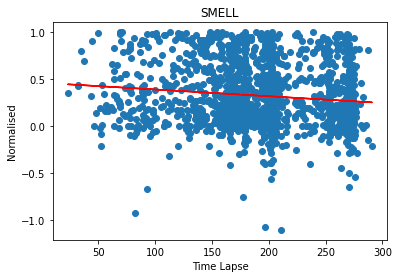

In [54]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.ylabel("Normalised")
plt.xlabel("Time Lapse")
plt.title("SMELL")
plt.show()

In [55]:
smell_df = data[['SurveyTimeLapse', 'Smell_current', 'Smell_before_illness', 'Smell_during_illness',  'Status', 'smell_loss_y']]
taste_df = data[['SurveyTimeLapse', 'Taste_current', 'Taste_before_illness', 'Taste_during_illness',  'Status', 'smell_loss_y']]

In [94]:
#smell_df.loc[(smell_df['Smell_current']/smell_df['Smell_before_illness']) - (smell_df['Smell_during_illness']/smell_df['Smell_before_illness'])<0.8, 'Status'] = 0
#smell_df.loc[(smell_df['Smell_current']/smell_df['Smell_before_illness']) - (smell_df['Smell_during_illness']/smell_df['Smell_before_illness'])>=0.8, 'Status'] = 1

smell_df.loc[(smell_df['Smell_current']/smell_df['Smell_before_illness'])>=0.8, 'Status'] = 1
smell_df.loc[(smell_df['Smell_current']/smell_df['Smell_before_illness'])<0.8, 'Status'] = 0

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [95]:
smell_df["Status"] = smell_df["Status"].astype('bool')
smell_df[smell_df["Status"]==True].count()

<ipython-input-95-13a7f419945e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smell_df["Status"] = smell_df["Status"].astype('bool')


SurveyTimeLapse         691
Smell_current           691
Smell_before_illness    691
Smell_during_illness    691
Status                  691
smell_loss_y            691
dtype: int64

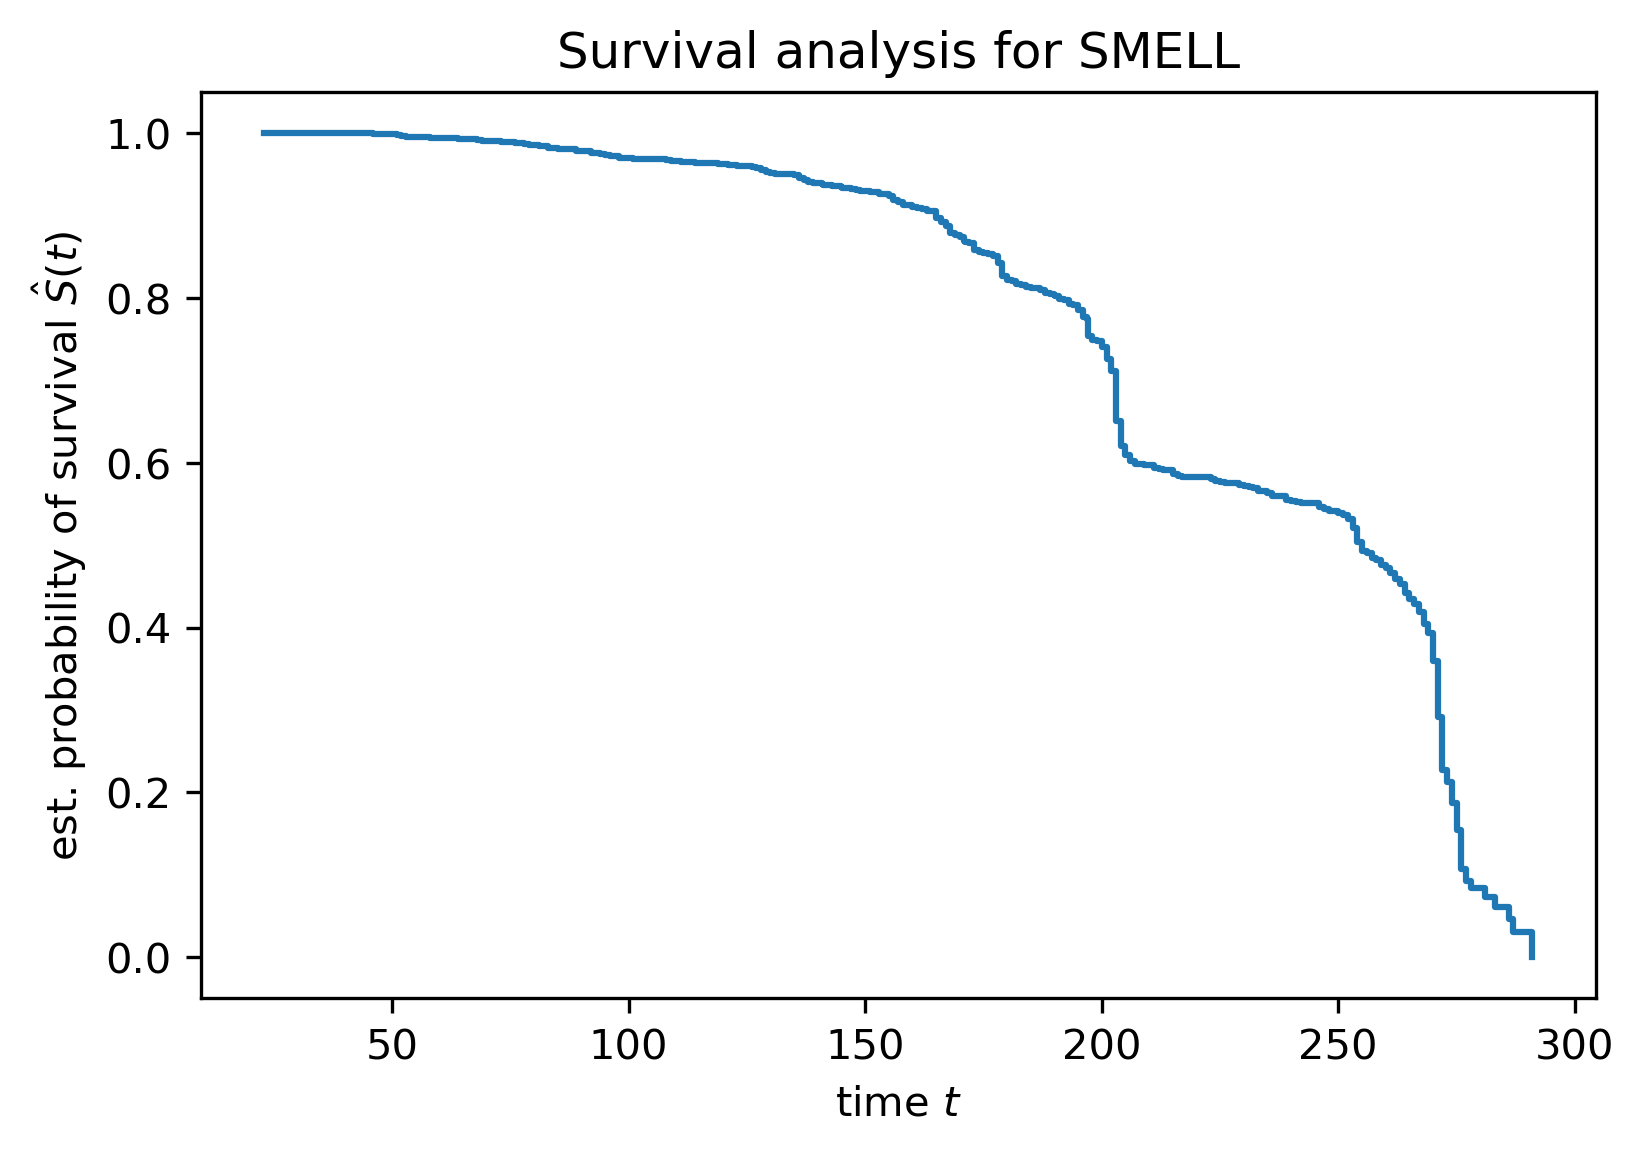

In [96]:
#Survival Analysis for SMELL
from sksurv.nonparametric import kaplan_meier_estimator
# 0 : long, 1 : normal

time, survival_prob = kaplan_meier_estimator(smell_df["Status"], smell_df["SurveyTimeLapse"])
plt.figure(dpi=300)
plt.step(time, survival_prob, where="post")
plt.title("Survival analysis for SMELL")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.show()

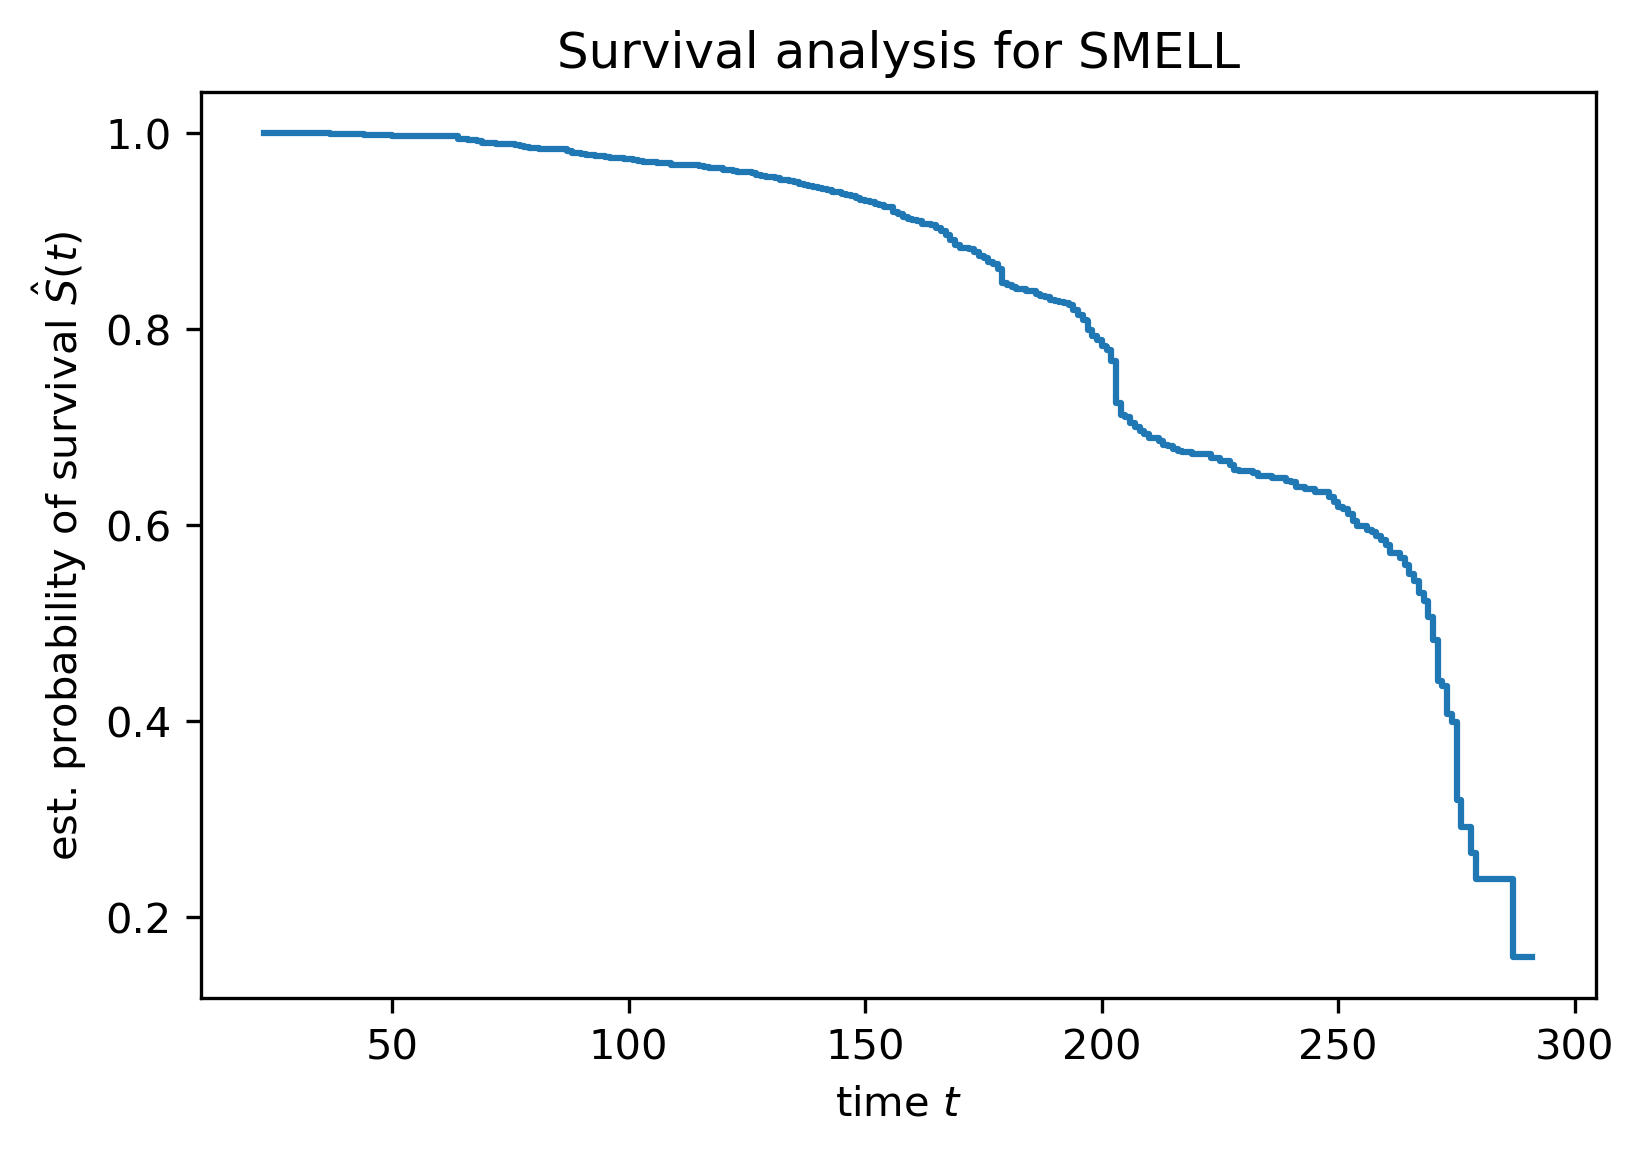

In [97]:
from sksurv.nonparametric import kaplan_meier_estimator
# 0 : long, 1 : normal

time, survival_prob = kaplan_meier_estimator(smell_df["smell_loss_y"].astype('bool'), smell_df["SurveyTimeLapse"])
plt.figure(dpi=300)
plt.step(time, survival_prob, where="post")
plt.title("Survival analysis for SMELL")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.show()

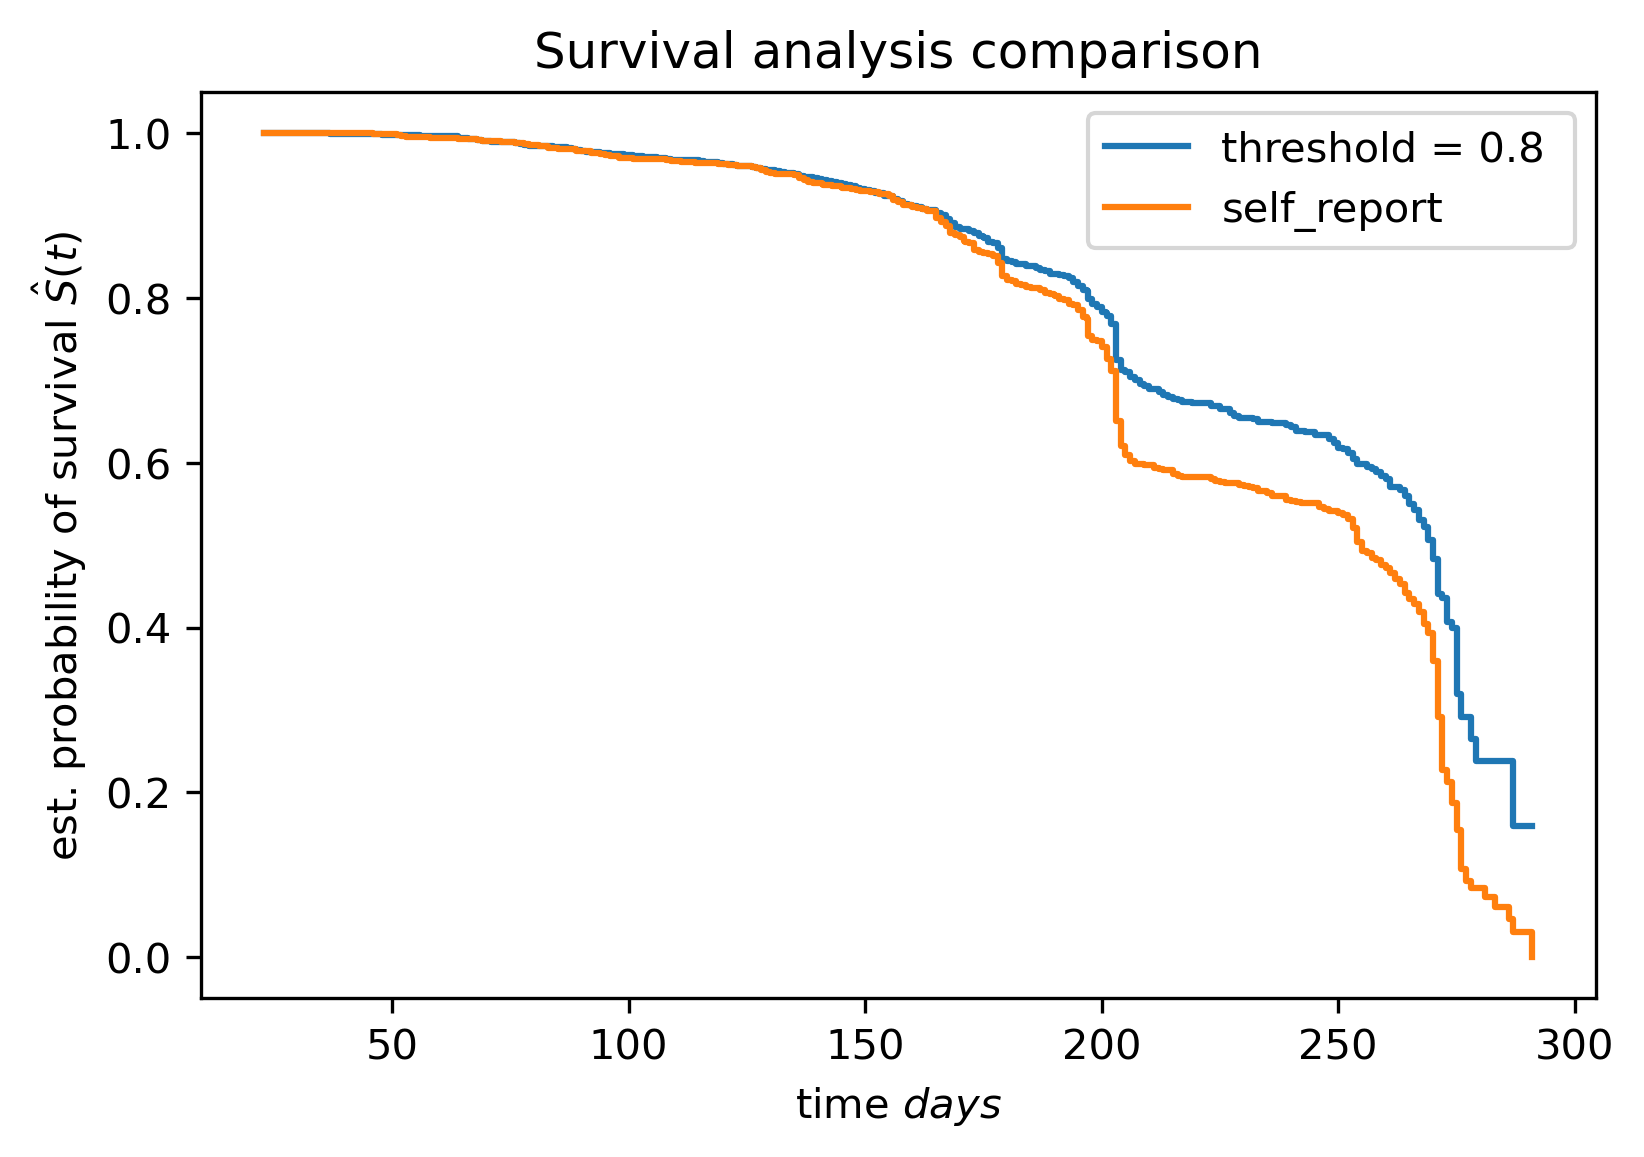

In [108]:
from sksurv.nonparametric import kaplan_meier_estimator
# 0 : long, 1 : normal

time, survival_prob_1 = kaplan_meier_estimator(smell_df["smell_loss_y"].astype('bool'), smell_df["SurveyTimeLapse"])
plt.figure(dpi=300)
time, survival_prob = kaplan_meier_estimator(smell_df["Status"], smell_df["SurveyTimeLapse"])

plt.step(time, survival_prob_1, time,survival_prob, where="post")
plt.title("Survival analysis comparison")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $days$")
plt.gca().legend(('threshold = 0.8 ','self_report'))

plt.show()

In [21]:
smell_df[smell_df["Status"]==1]["Status"]

3       True
4       True
5       True
7       True
13      True
        ... 
2638    True
2640    True
2644    True
2647    True
2648    True
Name: Status, Length: 1041, dtype: bool

In [88]:
###    TASTE    ### 

In [89]:
X = np.array(data.SurveyTimeLapse).reshape(-1, 1)  
Y = np.array((data['Taste_before_illness']/data['Taste_before_illness']) - (data['Taste_current']/data['Taste_before_illness']))
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  # linear regression
Y_pred = linear_regressor.predict(X)  # predictions

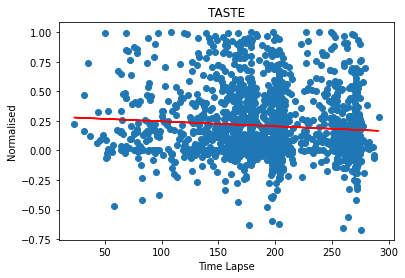

In [93]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.ylabel("Normalised")
plt.xlabel("Time Lapse")
plt.title("TASTE")
plt.show()

In [94]:
taste_df.loc[(taste_df['Taste_current']/taste_df['Taste_before_illness']) - (taste_df['Taste_during_illness']/taste_df['Taste_before_illness'])<0.8, 'Status'] = 0
taste_df.loc[(taste_df['Taste_current']/taste_df['Taste_before_illness']) - (taste_df['Taste_during_illness']/taste_df['Taste_before_illness'])>=0.8, 'Status'] = 1

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [95]:
taste_df["Status"] = taste_df["Status"].astype('bool')
taste_df[taste_df["Status"]==True].count()

<ipython-input-95-ba943e7e06b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taste_df["Status"] = taste_df["Status"].astype('bool')


SurveyTimeLapse         509
Taste_current           509
Taste_before_illness    509
Taste_during_illness    509
Status                  509
dtype: int64

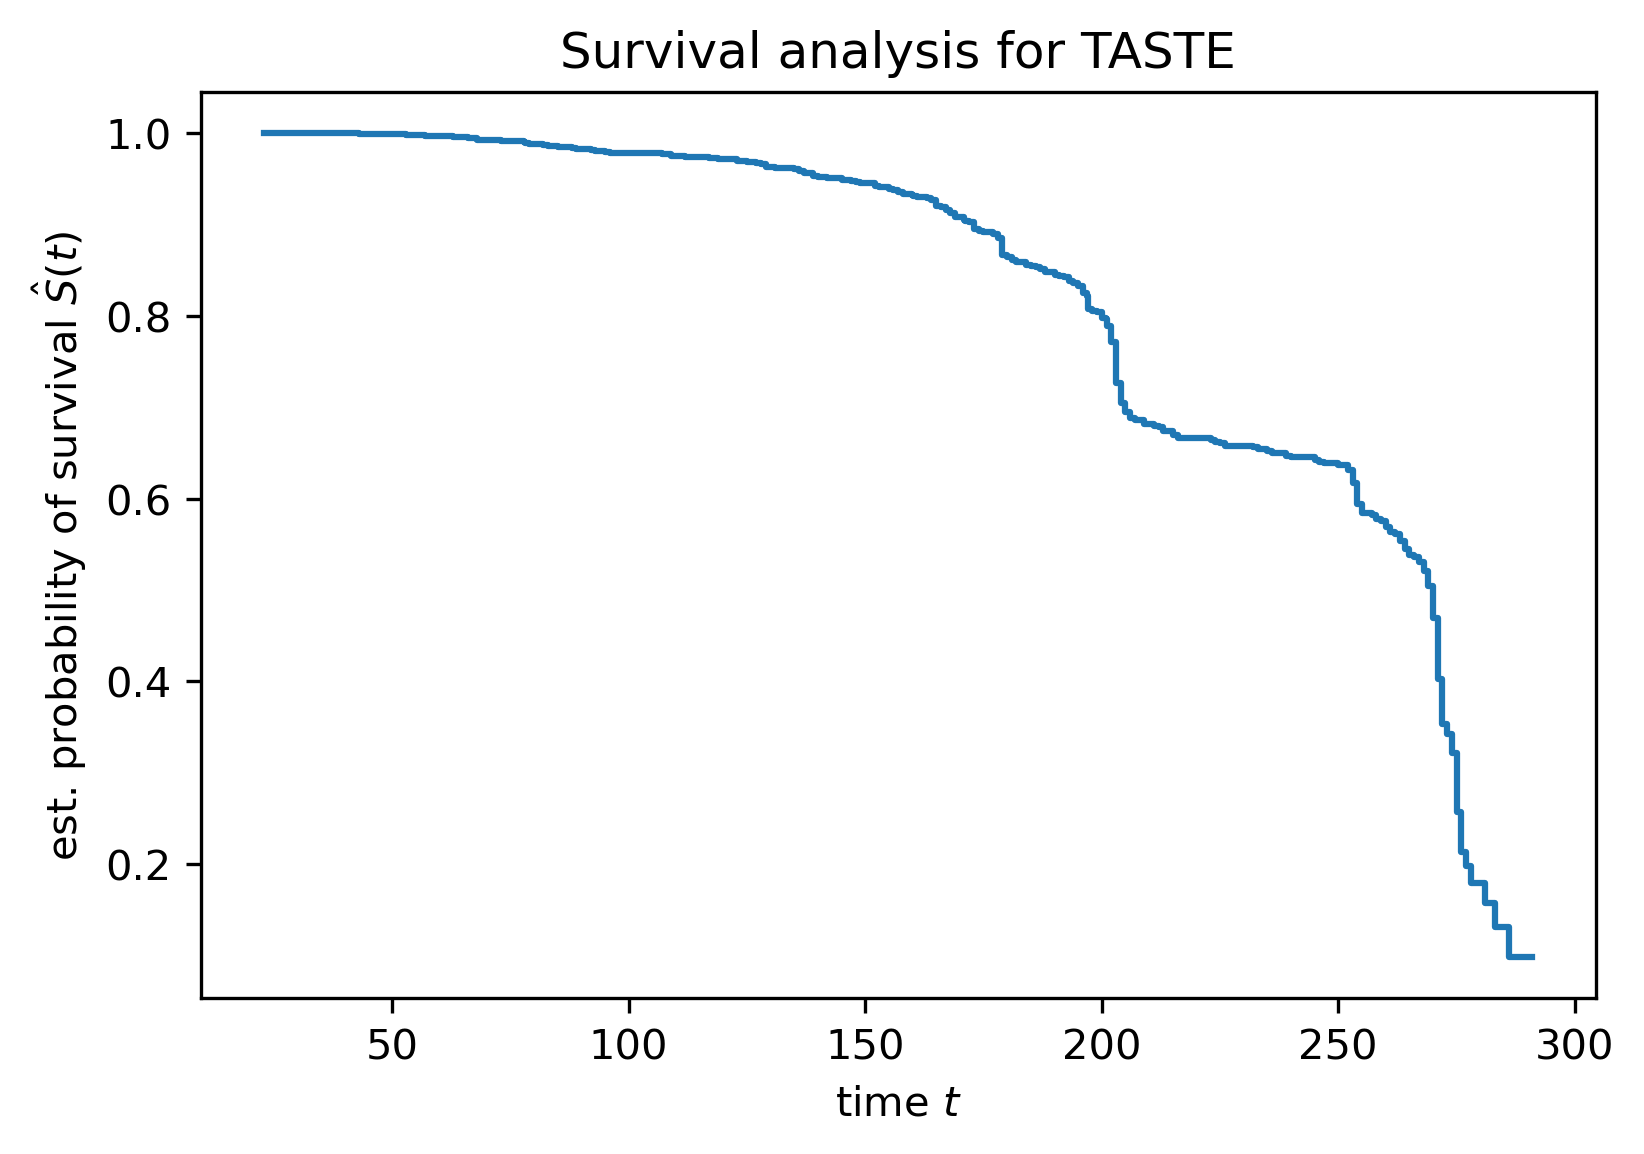

In [97]:
#Survival Analysis for TASTE
from sksurv.nonparametric import kaplan_meier_estimator
# 0 : long, 1 : normal

time, survival_prob = kaplan_meier_estimator(taste_df["Status"], taste_df["SurveyTimeLapse"])
plt.figure(dpi=300)
plt.step(time, survival_prob, where="post")
plt.title("Survival analysis for TASTE")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.show()